# Galaxies

### Load Galaxy Catalog

In [1]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python")
from main import copacabana
from make_input_files.make_input_datasets import make_master_file


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using Modified sklearn.mixture.GMM, modified to allow data weights


In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

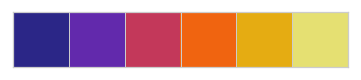

In [3]:
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.palplot(sns.color_palette("CMRmap"))

In [4]:
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata

In [5]:
cfg = '../config_files/config_buzzard_v2.yaml'
copa = copacabana(cfg)

def read_file(run_name,old=False):
    if old: run_name += '_old'
    gal   = copa.load_copa_out('members',run=run_name)
    return gal

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00001.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00002.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00003.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00004.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00005.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00006.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00007.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00008.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_gol

In [6]:
run = 'testEmu'
gal = read_file(run)

Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with

In [15]:
run  = 'test'
gal2 = read_file(run)

Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with

### Galaxy Selection

In [7]:
## colors
blue = '#2E86C1'
gray = '#A6ACAF'

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

def plot_precision_recall_vs_threshold(true_members,scores,title='',c1=blue,c2=gray):
    precisions, recalls, thresholds = precision_recall_curve(true_members, scores)

    ## optimal value
    idx = np.argmax(recalls*precisions)

    recall_opt_precision = recalls[idx]
    precision_opt_precision = precisions[idx]
    threshold_opt_precision = thresholds[idx]

    print("Optimal threshold: %.3f"%threshold_opt_precision)
    print("Optimal recall   : %.3f"%recall_opt_precision)
    print("Optimal precision: %.3f"%precision_opt_precision)

    _plot_precision_recall_vs_threshold(precisions, recalls, thresholds,c1=c1,c2=c2)
    plt.plot([threshold_opt_precision, threshold_opt_precision], [0., recall_opt_precision], "r:")
    plt.plot([0., threshold_opt_precision], [precision_opt_precision, precision_opt_precision], "r:")
    plt.plot([0., threshold_opt_precision], [recall_opt_precision, recall_opt_precision], "r:")
    plt.plot([threshold_opt_precision], [precision_opt_precision], "ro")
    plt.plot([threshold_opt_precision], [recall_opt_precision], "ro",label="Optimal value")
    plt.legend(loc=(1.05,0.8),fontsize=18)
    
    plt.title("%s "%title,fontsize=16)
    #plt.show()

def _plot_precision_recall_vs_threshold(precisions, recalls, thresholds, c1=blue, c2=gray):
    plt.plot(thresholds, precisions[:-1], c1, label="Purity", linewidth=4)
    plt.plot(thresholds, recalls[:-1], c2, label="Completeness", linewidth=4)
    plt.legend(fontsize=16)
    plt.xlabel(r'Threshold: $P_{mem}$', fontsize=20)
    plt.grid(True)                      
    plt.ylim(0.0,1.)
    plt.xlim(-0.01,1.01)
    ticks0 = np.arange(0.,1.01,0.1)
    plt.xticks(ticks0)
    plt.yticks(ticks0)



Optimal threshold: 0.276
Optimal recall   : 0.898
Optimal precision: 0.715


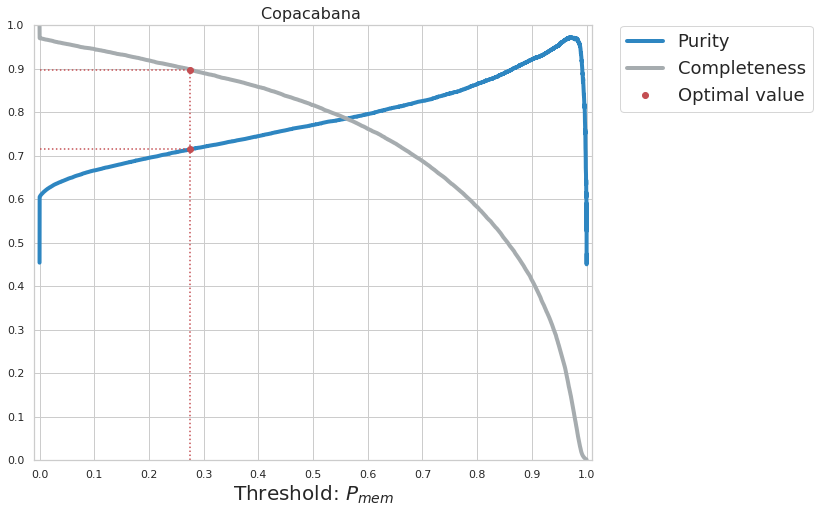

In [9]:
true_members1 = np.where(gal['True'],1.,0.)
scores1      = np.where(np.isnan(gal["Pmem"]),0,gal['Pmem'])
# scores = y_scores_forest
plt.figure(figsize=(10, 8))
plot_precision_recall_vs_threshold(true_members1,scores1,title='Copacabana')

Optimal threshold: 0.235
Optimal recall   : 0.956
Optimal precision: 0.718


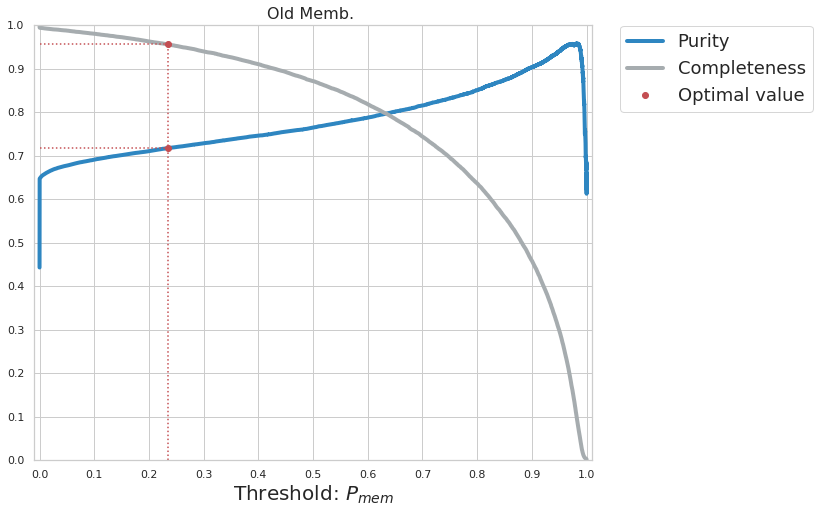

In [16]:
true_members2 = np.where(gal2['True'],1.,0.)
scores2 = np.where(np.isnan(gal2["Pmem"]),0,gal2['Pmem'])
# scores = y_scores_forest
plt.figure(figsize=(10, 8))
plot_precision_recall_vs_threshold(true_members2,scores2,title='Old Memb.')

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

def plot_precision_recall(precisions, recalls, color='b', label=None):
    plt.plot(recalls[:-1], precisions[:-1], color=color, label=label, linewidth=2)
    plt.xlabel(r'Completeness', fontsize=20)
    plt.ylabel(r'Purity', fontsize=20)
    plt.grid(True)                      
    plt.ylim(0.0,1.)
    plt.xlim(-0.01,1.01)
    ticks0 = np.arange(0.,1.01,0.1)
    plt.xticks(ticks0)
    plt.yticks(ticks0)
    plt.legend(fontsize=18)

In [18]:
def plot_purity_completeness_curve(scores,true_members,label=None,color='r',save='bla.png'):
    # scores = y_scores_forest

    precisions, recalls, thresholds = precision_recall_curve(true_members, scores)

    ## optimal value
    idx = np.argmax(recalls*precisions)
    
    recall_opt_precision = recalls[idx]
    precision_opt_precision = precisions[idx]
    threshold_opt_precision = thresholds[idx]
    
    y_pred_opt = scores>=threshold_opt_precision
    
    f1score= f1_score(true_members,y_pred_opt)
    
    print('photo-z: %s'%label)
    print("Optimal threshold: %.3f"%threshold_opt_precision)
    print("Optimal recall   : %.3f"%recall_opt_precision)
    print("Optimal precision: %.3f"%precision_opt_precision)
    print("Optimal F1 scoere: %.3f"%f1score)
    print('\n')
    
    label = "%s: P=%.2f,  C=%.2f"%(label,precision_opt_precision,recall_opt_precision)
    plot_precision_recall(precisions, recalls,color=color,label=label)
    plt.plot([recall_opt_precision, recall_opt_precision], [0., precision_opt_precision], "k:")
    plt.plot([0., recall_opt_precision], [precision_opt_precision, precision_opt_precision], "k:")
    plt.plot([recall_opt_precision], [precision_opt_precision], 'ro')
#     plt.legend(fontsize=20)
    # plt.title("Precision, Recall vs Threshold",fontsize=16)
    
    plt.savefig(save)
#     plt.show()

In [20]:
scores = [scores2,scores1]
labels = [true_members2,true_members1]

photo-z: Copacabana: $\sigma_0 = 0.03$
Optimal threshold: 0.235
Optimal recall   : 0.956
Optimal precision: 0.718
Optimal F1 scoere: 0.820


photo-z: emu BPZ (Mr $\leq $-19.8: $\sigma_0 = 0.03$
Optimal threshold: 0.276
Optimal recall   : 0.898
Optimal precision: 0.715
Optimal F1 scoere: 0.796




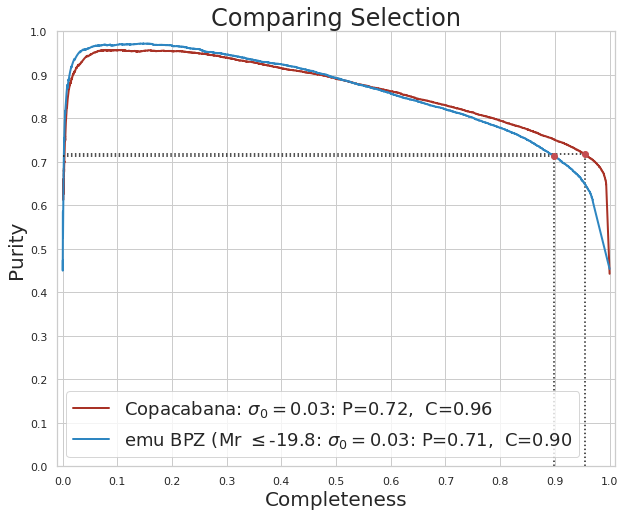

In [23]:
plt.figure(figsize=(10, 8))

red = '#A93226'
colors= [red,blue]
label = [r'Copacabana: $\sigma_0 = 0.03$',r'emu BPZ (Mr $\leq $-19.8: $\sigma_0 = 0.03$']
data  = [gal2,gal]

for i in range(2):
    plot_purity_completeness_curve(scores[i],labels[i],label=label[i],color=colors[i],save='fig_4l_pc_photozs.png')

plt.title('Comparing Selection',fontsize=24)
plt.savefig('fig_comparing_PC_oldMemb_Copa.png')

In [15]:
def plot_histograms(galaxies,prob,axs,xlabel=r'$P_{r}$'):
    mask = galaxies['True'] == True
    nmask = galaxies['True'] == False

    xbins = np.linspace(0.,1.,11)
    
    # axis.hist(prob,bins=xbins,ec='blue', fc='none', lw=1.5, histtype='step',label='All')
    axs.hist(prob[mask],bins=xbins,ec='red', fc='none', lw=1.5, histtype='step',label='True members')
    axs.hist(prob[nmask],bins=xbins,ec='gray', fc='none', lw=1.5, histtype='step',label='Non members')
    
    axs.set_xlabel(r'$P_{%s}$'%xlabel[1:],fontsize=16)
    axs.set_ylabel('N')

def plot_single_histogram(galaxies,prob,lcol,title='Buzzard v1.6'):
        
    fig, ax = plt.subplots(figsize=(6,6))
    plot_histograms(galaxies,prob,ax,xlabel=lcol)
    plt.legend(loc='upper left',fontsize=12)
    fig.suptitle(title,fontsize=16)
    
def plot_grid_histograms(galaxies,title='Buzzard v1.6'):
    fig, axis = plt.subplots(2, 2, figsize=(8,8), sharex='col', sharey='all')

    labels = [['Pr','Pz'],['Pc','Pmem']]
    for i in range(2):
        for j in range(2):
            prob = galaxies[labels[i][j]]
            prob[np.isnan(prob)] = 0.
            plot_histograms(galaxies,prob,axis[i,j],xlabel=labels[i][j])

            if i ==0 and j==0: axis[0,0].legend(loc='upper left',fontsize=12)
    
    axis[0,0].set_xlim(-0.01,1.01)
    axis[0,1].set_xlim(-0.01,1.01)
    fig.suptitle(title,fontsize=16)
    fig.tight_layout()

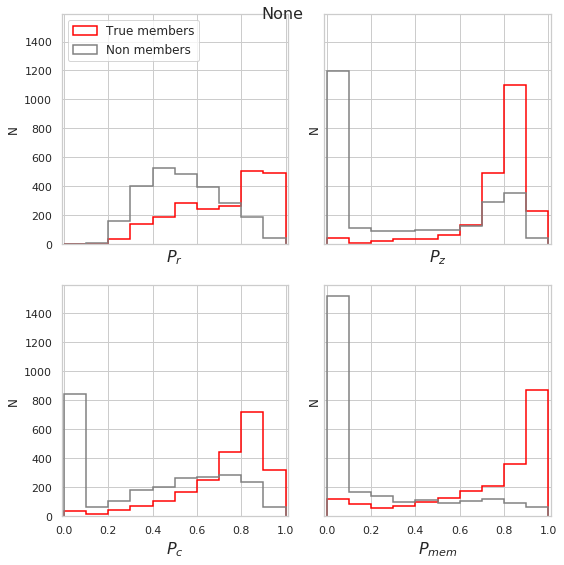

In [16]:
plot_grid_histograms(gal,title=None)
plt.savefig('fig_4e_prob_hist.png')

In [17]:
plot_grid_histograms(gal2,title=None)
#plt.savefig('fig_4e_prob_hist.png')

NameError: name 'gal2' is not defined

### Mag Evolution

In [ ]:
amag = gal['Mr']
mag  = gal['rabs']

#mass = gal['stellar_mass']

In [ ]:
zcls = gal['z_true']

In [ ]:
mask = gal['True']
plt.scatter(zcls[mask],amag[mask]-mag[mask],s=20,alpha=0.1)
plt.ylabel(r'$M_r^{Buzz}-M_{r}^{BMA}$ [mag]',fontsize=20)
plt.xlim(0.,1.)

In [ ]:
mask = gal['True']
plt.scatter(zcls,amag-mag,s=10,alpha=0.1)
plt.scatter(zcls[mask],amag[mask]-mag[mask],s=10,alpha=0.1)
plt.ylabel('Mr')
plt.xlim(0.,1.)

In [ ]:
plt.scatter(zcls,np.log10(mass),s=2,alpha=0.1)
plt.ylabel('stellar_mass')
plt.xlim(0.,1.)